<a href="https://colab.research.google.com/github/m-and-ms/Question-Clustering-/blob/master/Context_Question_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
import re
import nltk

import nltk
nltk.download('punkt')
import re 
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
! pip install -U sentence-transformers


     |████████████████████████████████| 61kB 2.2MB/s 
     |████████████████████████████████| 645kB 9.1MB/s 
     |████████████████████████████████| 1.1MB 44.5MB/s 
     |████████████████████████████████| 890kB 44.9MB/s 
     |████████████████████████████████| 3.8MB 44.1MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.2.6.1-cp36-none-any.whl size=74031 sha256=71c381ff242a33b880d1414aa1afe2e19d6b1a8a84cb7035cda85057f621c738
  Stored in directory: /root/.cache/pip/wheels/d7/fa/17/2b081a8cd8b0a86753fb0e9826b3cc19f0207062c0b2da7008
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=3fc465a02264c4b6d808020a454a5935ba70570981823e334195ead44760fdef
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [0]:
import pandas as pd 
from sklearn import decomposition
import numpy as np 

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn import decomposition

In [0]:
	
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('bert-large-nli-stsb-mean-tokens')


100%|██████████| 1.24G/1.24G [00:53<00:00, 23.1MB/s]


In [0]:
# Corpus with example sentences
sent = ['A man is eating food.']

sent_embeddings = bert_model.encode(sent)

In [0]:
np.asarray(sent_embeddings).shape

(1, 1024)

In [0]:


import json
questions=[]
with open('WebQSP.train.json') as json_file:
    data = json.load(json_file)
    for question in data['Questions'] :
         questions.append(question['ProcessedQuestion'])

print(questions[:3])  



['what is the name of justin bieber brother', 'what character did natalie portman play in star wars', 'what country is the grand bahama island in']


In [0]:
from nltk.corpus import stopwords
stops = list(stopwords.words("english"))
def clean(text):
    
    tokens = nltk.word_tokenize(text)
    
    
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) >= 3 :
        
            
            filtered_tokens.append(token)
    #stems = [stemmer.stem(t) for t in filtered_tokens]
    words = [w.lower() for w in filtered_tokens if not w in stops]
    return " ".join(words)

In [0]:
questions=[clean(q)for q in questions]

In [0]:
bert_encoded_corpus =bert_model.encode(questions)


In [0]:
np.asarray(encoded_corpus).shape

(3098, 1024)

In [0]:

num_clusters = 2
kmeans_bert = MiniBatchKMeans(n_clusters=num_clusters)
kmeans_bert.fit(bert_encoded_corpus)
bert_labels =kmeans_bert.labels_

In [0]:
preds =kmeans_bert.predict(bert_encoded_corpus)

preds.shape

(3098,)

In [0]:
clustered_sentences = [[] for i in range(num_clusters)]


for sentence_id, cluster_id in enumerate(bert_labels):
 
  clustered_sentences[cluster_id].append(questions[sentence_id])
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")  

Cluster  1
['what is the name of justin bieber brother', 'what character did john noble play in lord of the rings', 'who does joakim noah play for', 'how old is sacha baron cohen', 'who did draco malloy end up marrying', 'which kennedy died first', 'what high school did president bill clinton attend', 'what movies does taylor lautner play in', 'what year lebron james came to the nba', 'which wife did king henry behead', "who was ishmael 's mom", 'what was malcolm x trying to accomplish', 'what city did esther live in', 'what sport do the toronto maple leafs play', 'what is saint nicholas known for', "what is cher 's son 's name", 'what party was andrew jackson', 'what did william shakespeare do for a living', 'what county is heathrow airport in', 'what movie is josh hutcherson in', 'where do the san francisco giants play home games', 'what year did william jennings bryan run for president', 'what was the name of frederick douglass book', "who was queen victoria 's parents called", 'wha

In [0]:
type1_occurences_b = np.count_nonzero(bert_labels == 0)
type2_occurences_b = np.count_nonzero(bert_labels== 1)
print("Cluster1:" ,type1_occurences_b,"Cluster1 % :",type1_occurences_b/(3098)) 
print('Cluster2:',type2_occurences_b,"Cluster2 % :",type2_occurences_b/3098)

Cluster1: 1416 Cluster1 % : 0.45706907682375725
Cluster2: 1682 Cluster2 % : 0.5429309231762427


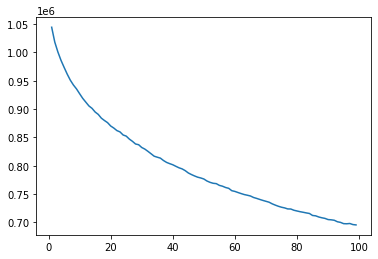

In [0]:
# k-means clustering
from numpy import unique
from numpy import where

res=[]
for i in range(1,30):
     bert_test = KMeans(n_clusters=i,random_state=42)
     bert_test.fit(bert_encoded_corpus)
     res.append(bert_test.inertia_)


plt.plot(range(1,30),res)    

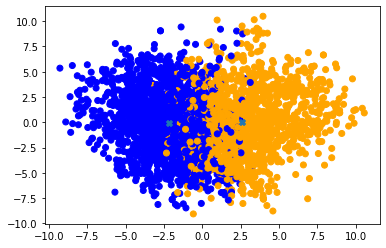

In [0]:
colors =['orange','blue','green','red','violet','black','gray','darkgreen','c','m','y','brown','indigo','crimson','peru','peachpuff','yellow','lime','darkred','skyblue']

bert_color_labels=[colors[label] for label in bert_labels ]
pca_bert= decomposition.PCA(n_components=2).fit(bert_encoded_corpus)
bert_coords=pca_bert.transform(bert_encoded_corpus)

plt.scatter(bert_coords[:,0],bert_coords[:,1],c=bert_color_labels)
bert_centroids=kmeans_bert.cluster_centers_

bert_centroidcoords=pca_bert.transform(bert_centroids)
plt.scatter(bert_centroidcoords[:,0],bert_centroidcoords[:,1],marker='X')
plt.show()

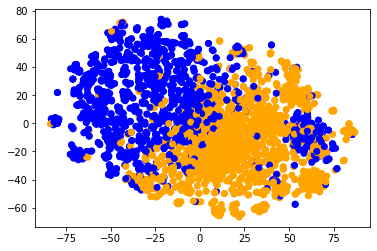

In [0]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components =2 ,random_state =0,metric ='euclidean')
tsne_preds =tsne_model.fit_transform(encoded_corpus)

plt.scatter(tsne_preds[:,0],tsne_preds[:,1],c=bert_color_labels)
plt.show()

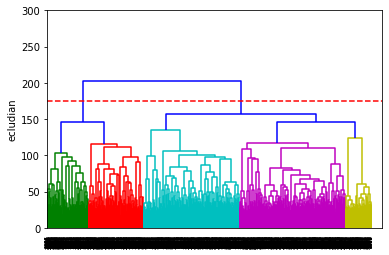

In [0]:

d=hierarchy.linkage(bert_encoded_corpus,'ward')
dn=hierarchy.dendrogram(d)

plt.ylabel('ecludian')
plt.xlim(0,32000)
plt.ylim(0,300)
#plt.plot(dn)
plt.axhline(y=175, color='r', linestyle='--')
plt.show()


In [0]:
hierarchy_model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
preds =hierarchy_model.fit_predict(encoded_corpus)
print(preds)

[0 0 1 ... 0 0 0]


In [0]:
! pip install flair


In [0]:
! pip install allennlp

     |████████████████████████████████| 7.6MB 2.7MB/s 
     |████████████████████████████████| 30.9MB 109kB/s 
     |████████████████████████████████| 204kB 47.2MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 163kB 49.7MB/s 
     |████████████████████████████████| 256kB 49.4MB/s 
     |████████████████████████████████| 5.2MB 47.6MB/s 
     |████████████████████████████████| 133kB 50.6MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 245kB 46.8MB/s 
     |████████████████████████████████| 2.1MB 44.1MB/s 
     |████████████████████████████████| 92kB 11.4MB/s 
     |████████████████████████████████| 3.2MB 46.4MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Created wheel for ftfy: filename=ftfy-5.7-cp36-none-any.whl size=44593 sha256=c2e78cce89e813e147167f57fc81e99d68eabd66e781071baf8c736253f49234
  Stored in directory: /root/.cache/pip/wheels/8e/da/59/6c8925d571aacade638a0f5

In [0]:
from flair.embeddings import ELMoEmbeddings
from flair.data import Sentence
elmo = ELMoEmbeddings('original')


In [0]:
def encode_sent(sentence,elmo):
  encoded_sent=[]
  sent =Sentence(sentence)
  elmo.embed(sent)
  for token in sent :
    encoded_sent.append(token.embedding.numpy().T)

  return np.asarray(encoded_sent).mean(axis =0).reshape(1,-1)

In [0]:
elmo_encoded_corpus =np.asarray([encode_sent(sent,elmo) for sent in questions]).reshape(3098,-1)

In [0]:
#np.concatenate((encoded_corpus,elmo_encoded_corpus), axis=0)
elmo_encoded_corpus= elmo_encoded_corpus.reshape(3098,-1)
elmo_encoded_corpus.shape


(3098, 3072)

In [0]:
eb_feats=np.concatenate((encoded_corpus,elmo_encoded_corpus),axis=1)

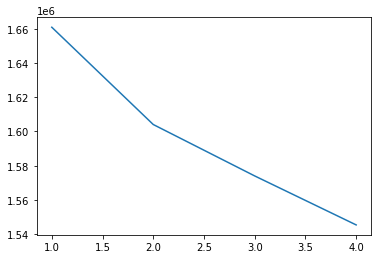

In [0]:
from numpy import unique
from numpy import where

eb_res=[]
for i in range(1,5):
     model_eb = KMeans(n_clusters=i,random_state=42)
     model_eb.fit(eb_feats)
     eb_res.append(model_eb.inertia_)


plt.plot(range(1,5),eb_res)   

In [0]:

num_clusters = 2
kmeans_eb = MiniBatchKMeans(n_clusters=num_clusters)
kmeans_eb.fit(eb_feats)
eb_labels =kmeans_eb.labels_

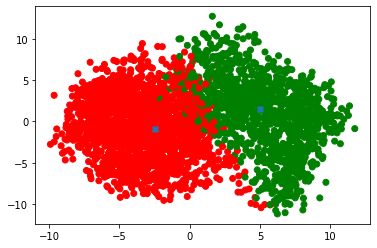

In [0]:
colors=['red','green','blue']
eb_label_colors=[colors[i] for i in eb_labels]
pca_eb= decomposition.PCA(n_components=2).fit(eb_feats)
coords_eb=pca_eb.transform(eb_feats)

plt.scatter(coords_eb[:,0],coords_eb[:,1],c=eb_label_colors)
centroids_eb=kmeans_eb.cluster_centers_

eb_centroidcoords=pca_eb.transform(centroids_eb)
plt.scatter(eb_centroidcoords[:,0],eb_centroidcoords[:,1],marker='X')
plt.show()

In [0]:
type1_occurences_eb = np.count_nonzero(eb_labels == 0)
type2_occurences_eb = np.count_nonzero(eb_labels == 1)
print("Cluster1:" ,type1_occurences_eb,"Cluster1 % :",type1_occurences_eb/(3098)) 
print('Cluster2:',type2_occurences_eb,"Cluster2 % :",type2_occurences_eb/3098)

Cluster1: 1891 Cluster1 % : 0.6103938024531956
Cluster2: 1207 Cluster2 % : 0.38960619754680437


In [0]:
def get_word_frequency(word_text):
    return 0.0001  

def sentence_to_vec(sentence_list, embedding_size=3072, a: float=1e-3):
    sentence_set = []
    
    for sentence in sentence_list:
        elmo_sent =Sentence(sentence)
        elmo.embed(elmo_sent)


        vs = np.zeros(embedding_size)  # add all word2vec values into one vector for the sentence
        sentence_length = len(list(elmo_sent))
        for word in elmo_sent:
            a_value = a / (a + get_word_frequency(word.text))  # smooth inverse frequency, SIF
            vs = np.add(vs, np.multiply(a_value, word.embedding.numpy()))  # vs += sif * word_vector

        vs = np.divide(vs, sentence_length)  # weighted average
       
        sentence_set.append(vs)  # add to our existing re-calculated set of sentences

    # calculate PCA of this sentence set
    pca = decomposition.PCA()
    pca.fit(np.array(sentence_set))
    u = pca.components_[0]  # the PCA vector
    u = np.multiply(u, np.transpose(u))  # u x uT

    # pad the vector?  (occurs if we have less sentences than embeddings_size)
    if len(u) < embedding_size:
        for i in range(embedding_size - len(u)):
            u = np.append(u, 0)  # add needed extension for multiplication below

    # resulting sentence vectors, vs = vs -u x uT x vs
    sentence_vecs = []
    for vs in sentence_set:
        sub = np.multiply(u,vs)
        sentence_vecs.append(np.subtract(vs, sub))

    return sentence_vecs

In [0]:
sentence_lst =['i ate you','i love you']
res =sentence_to_vec(sentence_lst)
res

[array([-0.20615378,  0.12538218,  0.09451641, ..., -0.27926763,
         0.39243038,  0.12765513]),
 array([-0.22788089,  0.00672796, -0.1458033 , ...,  0.07104858,
         0.95260805, -0.09472629])]

In [0]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(questions)

In [0]:
vectorizer.vocabulary_['roy']

2339

In [0]:
elmo_sif=sentence_to_vec(questions)

In [0]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
num_clusters = 2
kmeans_clustering_model_sif = MiniBatchKMeans(n_clusters=num_clusters)
kmeans_clustering_model_sif.fit(elmo_sif)
sif_preds =kmeans_clustering_model_sif.labels_

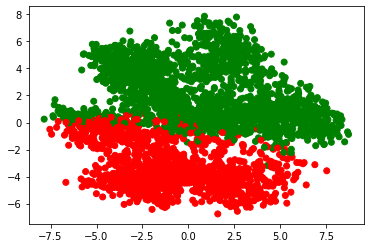

In [0]:
colors=['red','green','blue']
sif_label_colors=[colors[i] for i in sif_preds]
pca_sif= decomposition.PCA(n_components=2).fit(elmo_sif)
coords_sif=pca_sif.transform(elmo_sif)

plt.scatter(coords_sif[:,0],coords_sif[:,1],c=sif_label_colors)
#centroids_eb=hierarchy_model_eb.cluster_centers_

#centroidcoords=pca_eb.transform(centroids_eb)
#plt.scatter(centroidcoords[:,0],centroidcoords[:,1],marker='X')
plt.show()

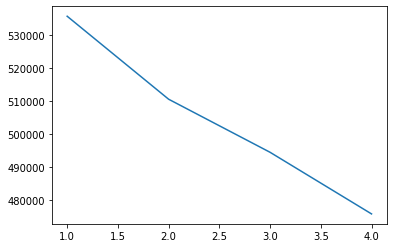

In [0]:
res_sif=[]
for i in range(1,5):
     model_sif = MiniBatchKMeans(n_clusters=i,random_state=42)
     model_sif.fit(elmo_sif)
     res_sif.append(model_sif.inertia_)


plt.plot(range(1,5),res_sif)   

In [0]:
type1_occurences_sif = np.count_nonzero(sif_preds == 0)
type2_occurences_sif = np.count_nonzero(sif_preds == 1)
print("Cluster1:" ,type1_occurences_sif,"Cluster1 % :",type1_occurences_sif/(3098)) 
print('Cluster2:',type2_occurences_sif,"Cluster2 % :",type2_occurences_sif/3098)

Cluster1: 1271 Cluster1 % : 0.4102646868947708
Cluster2: 1827 Cluster2 % : 0.5897353131052292


In [0]:
eb_sif=np.concatenate((np.asarray(elmo_sif),encoded_corpus),axis=1)

In [0]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
num_clusters = 2
kmeans_eb_sif = MiniBatchKMeans(n_clusters=num_clusters)
kmeans_eb_sif.fit(eb_sif)
eb_sif_preds =kmeans_eb_sif.labels_

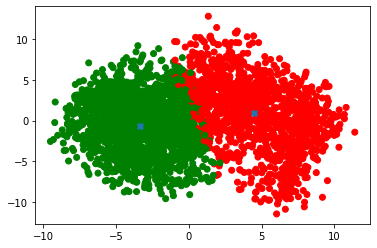

In [0]:
colors=['red','green','blue']
eb_sif_label_colors=[colors[i] for i in eb_sif_preds]
eb_pca_sif= decomposition.PCA(n_components=2).fit(eb_sif)
coords_eb_sif=eb_pca_sif.transform(eb_sif)

plt.scatter(coords_eb_sif[:,0],coords_eb_sif[:,1],c=eb_sif_label_colors)
centroids_eb_sif=kmeans_eb_sif.cluster_centers_

centroidcoords_eb_sif=eb_pca_sif.transform(centroids_eb_sif)
plt.scatter(centroidcoords_eb_sif[:,0],centroidcoords_eb_sif[:,1],marker='X')
plt.show()

In [0]:
type1_occurences_eb_sif = np.count_nonzero(eb_sif_preds == 0)
type2_occurences_eb_sif = np.count_nonzero(eb_sif_preds == 1)

In [0]:
print("Cluster1:" ,type1_occurences_eb_sif,"Cluster1 % :",type1_occurences_eb_sif/(3098)) 
print('Cluster2:',type2_occurences_eb_sif,"Cluster2 % :",type2_occurences_eb_sif/3098)

Cluster1: 1302 Cluster1 % : 0.42027114267269206
Cluster2: 1796 Cluster2 % : 0.579728857327308
